In [1]:
!pip install rasterio

In [2]:
import rasterio 
from rasterio import plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import os
import copy
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
%matplotlib inline

2021-11-08 08:29:17.033119: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ubuntu/.local/lib/python3.8/site-packages/cv2/../../lib64:
2021-11-08 08:29:17.033165: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
band3_1 = rasterio.open("/home/ubuntu/3rd-Year-Project/NDWI/Images/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B3.TIF")
band5_1 = rasterio.open("/home/ubuntu/3rd-Year-Project/NDWI/Images/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B5.TIF")

band3_2 = rasterio.open("/home/ubuntu/3rd-Year-Project/NDWI/Images/LC08_L2SP_141045_20211023_20211103_02_T1_SR_B3.TIF")
band5_2 = rasterio.open("/home/ubuntu/3rd-Year-Project/NDWI/Images/LC08_L2SP_141045_20211023_20211103_02_T1_SR_B5.TIF")

In [4]:
green_1 = band3_1.read(1).astype("float32")
nir_1 = band5_1.read(1).astype("float32")

green_2 = band3_2.read(1).astype("float32")
nir_2 = band5_2.read(1).astype("float32")

In [5]:
ndwi_1 = np.where(
    (green_1+nir_1) == 0.,
    0,
    (green_1-nir_1)/(green_1+nir_1)
)

ndwi_2 = np.where(
    (green_2+nir_2) == 0.,
    0,
    (green_2-nir_2)/(green_2+nir_2)
)

/tmp/ipykernel_1002/123817894.py:4: RuntimeWarning: invalid value encountered in true_divide
  (green_1-nir_1)/(green_1+nir_1)
/tmp/ipykernel_1002/123817894.py:10: RuntimeWarning: invalid value encountered in true_divide
  (green_2-nir_2)/(green_2+nir_2)


In [6]:
ndwi_copy_1 = copy.copy(ndwi_1)
ndwi_copy_1[ndwi_1>0] = -100

ndwi_copy_2 = copy.copy(ndwi_2)
ndwi_copy_2[ndwi_2>0] = -100

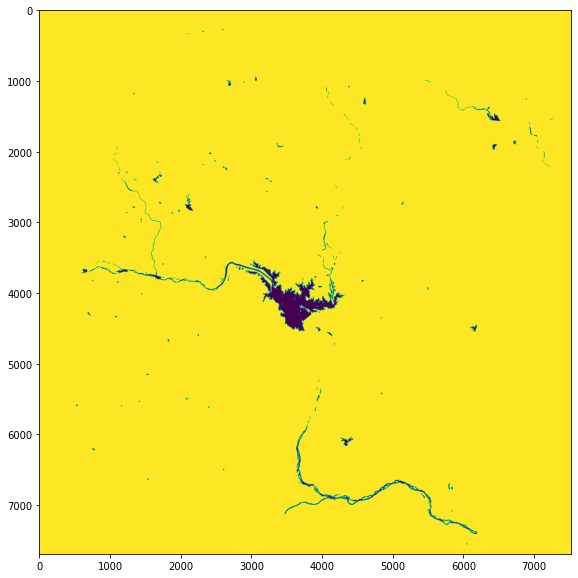

In [7]:
img = cv2.threshold(np.uint8(ndwi_copy_1), 0, 255, cv2.THRESH_BINARY)[1]

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img)
sizes = stats[1:, -1]
nb_components = nb_components - 1

min_size = 100

ndwi_components_1 = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        ndwi_components_1[output == i + 1] = -100

plt.figure(figsize=(10, 10))
plt.imshow(ndwi_components_1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


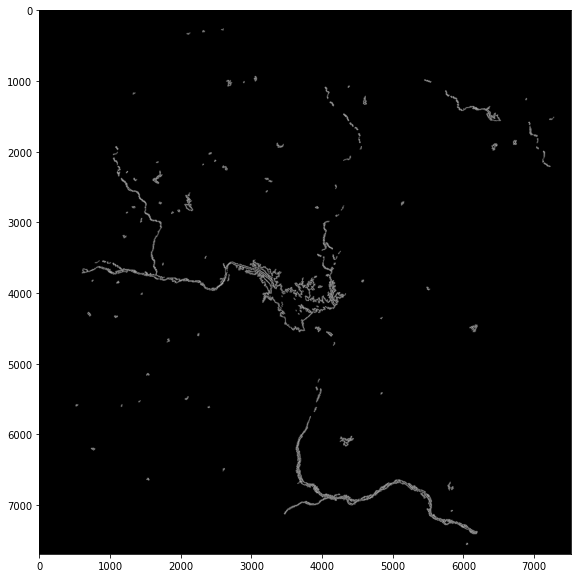

In [8]:
ndwi_components_1 = img_to_array(ndwi_components_1)
save_img('image_save_ndwi_components_1.jpg', ndwi_components_1)
image_ndwi_components_1 = cv2.imread('image_save_ndwi_components_1.jpg')

img_blur_ndwi_components_1 = cv2.GaussianBlur(image_ndwi_components_1, (3,3), 0)
sobel_ndwi_components_1 = cv2.Sobel(src=img_blur_ndwi_components_1, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
plt.figure(figsize=(10, 10))
plt.imshow(sobel_ndwi_components_1)

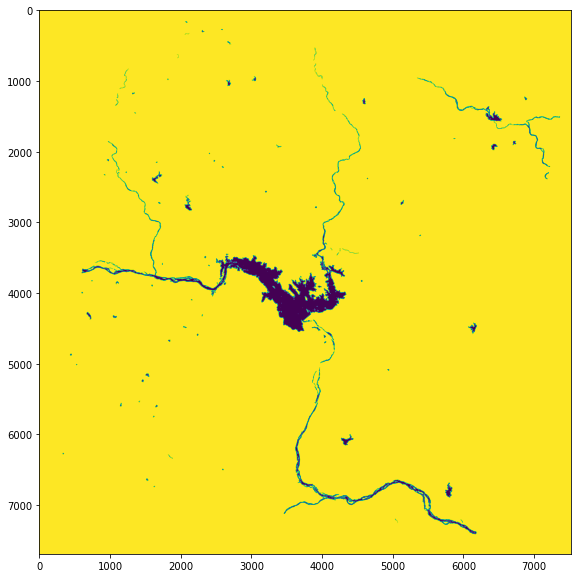

In [9]:
img = cv2.threshold(np.uint8(ndwi_copy_2), 0, 255, cv2.THRESH_BINARY)[1]

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img)
sizes = stats[1:, -1]
nb_components = nb_components - 1

min_size = 100

ndwi_components_2 = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] >= min_size:
        ndwi_components_2[output == i + 1] = -100

plt.figure(figsize=(10, 10))
plt.imshow(ndwi_components_2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


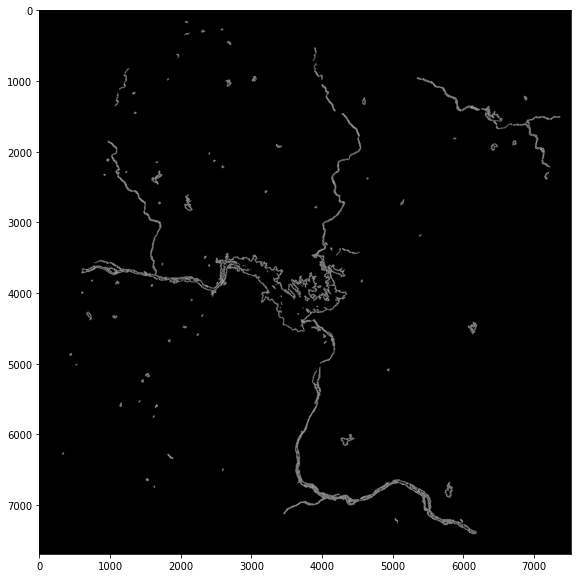

In [10]:
ndwi_components_2 = img_to_array(ndwi_components_2)
save_img('image_save_ndwi_components_2.jpg', ndwi_components_2)
image_ndwi_components_2 = cv2.imread('image_save_ndwi_components_2.jpg')

img_blur_ndwi_components_2 = cv2.GaussianBlur(image_ndwi_components_2, (3,3), 0)
sobel_ndwi_components_2 = cv2.Sobel(src=img_blur_ndwi_components_2, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
plt.figure(figsize=(10, 10))
plt.imshow(sobel_ndwi_components_2)

In [11]:
Area = 323
PixelCCAreaNIR_1 = (Area*(len(np.where(ndwi_components_1 == -100)[0]))/(ndwi_copy_1.shape[0]*ndwi_copy_1.shape[1]))
PixelCCAreaNIR_2 = (Area*(len(np.where(ndwi_components_2 == -100)[0]))/(ndwi_copy_2.shape[0]*ndwi_copy_2.shape[1]))

print("Area of First :", PixelCCAreaNIR_1, "KM2")
print("Area of Second :", PixelCCAreaNIR_2, "KM2")

Area of First : 3.083140621074842 KM2
Area of Second : 5.365940062489789 KM2
